In [1]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [2]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/기획경영_전처리/경영기획전략.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,신규 개발 중인 헬스케어 서비스의 POProduct Owner로서 기획 및 운영 ...,PC Mobile 웹 앱등의 환경에서 3년 이상 서비스 기획을 경험 하신 분 특...
1,이런 팀에서 일을 합니다 사업개발팀은 사업확대를 위해 반도체 관련 사업기회를 발굴...,신사업 기획 및 관리 15년 이상 경력이 필요합니다팀을 리드한 5년이상 팀장경력을...
2,합류하여 담당하실 업무입니다 전사 경영전략 경영계획 전략과제를 수립합니다 전사 KP...,이런 역량과 경험을 갖추신 분을 찾습니다 5년 이상 10년 이하의 경영 관리 경력을...
3,플랫폼 사업 운영 및 지표매출손익 관리 플랫폼 운영 단의 경영계획 수립 및 실적 관...,경영관리매출손익 및 경영기획전략기획 관련 업무 경험 57년 이상 보유자 온라인 커...
4,고객이 Jober를 사용하면서 문의하는 것에 대해 안내하고 이를 기록해 요청이 많...,B2B B2C IT Service에 이해도가 높고 IT 시스템 사용에 능숙한 분...
...,...,...
89,채용직급 차부장급 1명 분야 컨슈머 및 헬스케어 비즈니스 전사 영업 사업전략 기획...,학력 대졸 이상 4년경력 업무 경력 10년 이상어학 영어회화 가능자 경영 및 ...
90,MGRV가 전개하는 다양한 형태의 사업의 수익성 개선 및 고객 만족도 제고를 위한 ...,기업의 PL 지표에 대한 이해를 바탕으로 수익성 개선을 위한 과제 정의가 가능하...
91,사업기획 사업전략 및 사업계획 수립 대외협력국내외 관련업체 IR 홍보...,전장업체 경력자 전자컴퓨터정보통신 관련 전공자 시장과 기술에 대한 이해도가 높은 ...
92,알파브라더스 IR 팀으로 합류하시면 크리에이티브 소속으로 다음과 같은 일을 합니다 ...,이런 분과 함께 하고 싶어요 한글 PPT 엑셀 등 OA 툴 사용이 가능한 분 원활...


In [3]:
#사용할 column 선택
df = df[['자격요건 및 우대사항']]
df

,자격요건 및 우대사항
0,PC Mobile 웹 앱등의 환경에서 3년 이상 서비스 기획을 경험 하신 분 특...
1,신사업 기획 및 관리 15년 이상 경력이 필요합니다팀을 리드한 5년이상 팀장경력을...
2,이런 역량과 경험을 갖추신 분을 찾습니다 5년 이상 10년 이하의 경영 관리 경력을...
3,경영관리매출손익 및 경영기획전략기획 관련 업무 경험 57년 이상 보유자 온라인 커...
4,B2B B2C IT Service에 이해도가 높고 IT 시스템 사용에 능숙한 분...
...,...
89,학력 대졸 이상 4년경력 업무 경력 10년 이상어학 영어회화 가능자 경영 및 ...
90,기업의 PL 지표에 대한 이해를 바탕으로 수익성 개선을 위한 과제 정의가 가능하...
91,전장업체 경력자 전자컴퓨터정보통신 관련 전공자 시장과 기술에 대한 이해도가 높은 ...
92,이런 분과 함께 하고 싶어요 한글 PPT 엑셀 등 OA 툴 사용이 가능한 분 원활...


In [4]:
#txt로 저장
i = 'C:/Users/User/Desktop/기획경영/경영기획전략(자격요건 및 우대사항).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [5]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'자격요건 및 우대사항\n PC Mobile 웹 앱등의 환경에서 3년 이상 서비스 기획을 경험 하신 분  특정 사용자군에 대한 Research를 통해 서비스 방향성 수립 가능 하신 분  서비스의 기획부터 출시까지 기획디자인개발검증운영 전반적인 프로젝트 리드 가능하신 분 서비스 정책 정의 사업전략에 맞춘 우선순위 수립 주요 지표 설정 등의 업무 수행 가능하신 분 수집된 서비스 데이터와 사용자 피드백을 활용해 정량정성적 분석을 통해 서비스 개선점 도출 가능하신 분포트폴리오 제출 필수 사용자 입장에서 깊게 고민하고 사용자의 불편사항과 태스크를 분석하여 프로덕트의 UX 설계를 할 수 있는 분 많은 사용자들을 대상으로 하는 서비스의 기획 및 운영을 경험하신 분  서비스 초기 기획부터 출시 및 운영 까지 프로젝트의 전체 단계를 경험하신 분  헬스케어 서비스와 플랫폼 기획 및 운영을 경험하신 분\n 신사업 기획 및 관리 15년 이상 경력이 필요합니다팀을 리드한 5년이상 팀장경력을 포함합니다 전기전자공학 재료공학 기계공학 화학공학 전공이 필요합니다 반도체 산업내 신사업 기획 관리 경력이 필요합니다 다양한 분야에 대한 관심 및 학습 능력이 필요합니다 문제해결 및 원인 분석능력이 필요합니다 주도적 능동적 과제를 창출할 수 있는 능력이 필요합니다 최고수준의 투명성과 도덕성이 필요합니다 기획 법무 특허 전반 수행 또는 관리 경력이 있으면 좋습니다 전략기획 프로세스 실무경력이 있으면 좋습니다 제조 유통 대기업 상장기업 경력이 있으면 좋습니다 영어회화가 가능하면 더 좋습니다\n이런 역량과 경험을 갖추신 분을 찾습니다 5년 이상 10년 이하의 경영 관리 경력을 보유하신 분 전략기획경영기획사업관리 사업의 정성적정량적 분석을 통해 개선방향을 도출하고 실행한 경험이 있으신 분 법인 혹은 플랫폼별 사업계획을 수립하고 변화를 추진해본 경험이 있으신 분 KPI 기반의 사업계획 수립 손익비용 관리 경험이 있으신 분 유연한 태도로 변화에 대한 빠른 적응력을 갖추신 분이런 역량과 경험을 갖추신 분이면 

In [6]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['자격',
 '요건',
 '및',
 '우대',
 '사항',
 '웹',
 '앱등',
 '환경',
 '이상',
 '서비스',
 '기획',
 '경험',
 '분',
 '특정',
 '사용자',
 '대한',
 '를',
 '통해',
 '서비스',
 '방향성',
 '수립',
 '가능',
 '분',
 '서비스',
 '기획',
 '출시',
 '기획',
 '디자인',
 '개발',
 '검증',
 '운영',
 '전반',
 '프로젝트',
 '리드',
 '분',
 '서비스',
 '정책',
 '정의',
 '사업',
 '전략',
 '우선',
 '순위',
 '수립',
 '주요',
 '지표',
 '설정',
 '등',
 '업무',
 '수행',
 '분',
 '수집',
 '서비스',
 '데이터',
 '사용자',
 '피드백',
 '활용',
 '정량',
 '정성',
 '분석',
 '통해',
 '서비스',
 '개선',
 '점',
 '도출',
 '분',
 '포트폴리오',
 '제출',
 '필수',
 '사용자',
 '입장',
 '고민',
 '사용자',
 '불편',
 '사항',
 '태스크',
 '분석',
 '프로덕트',
 '설계',
 '수',
 '분',
 '사용자',
 '대상',
 '서비스',
 '기획',
 '및',
 '운영',
 '경험',
 '분',
 '서비스',
 '초기',
 '기획',
 '출시',
 '및',
 '운영',
 '프로젝트',
 '전체',
 '단계',
 '경험',
 '분',
 '헬',
 '스케',
 '서비스',
 '플랫폼',
 '기획',
 '및',
 '운영',
 '경험',
 '분',
 '사업',
 '기획',
 '및',
 '관리',
 '이상',
 '경력',
 '팀',
 '리드',
 '팀',
 '경력',
 '포함',
 '전기',
 '전자공학',
 '재료공학',
 '기계공학',
 '화학공학',
 '전공',
 '반도체',
 '산업',
 '내',
 '사업',
 '기획',
 '관리',
 '경력',
 '분야',
 '대한',
 '관심',
 '및',
 '학습',
 '능력',
 '문제해결',
 '및',
 '원인'

In [7]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

4854
679


FreqDist({'분': 381, '경험': 240, '및': 122, '경력': 117, '보유': 100, '이상': 90, '관련': 83, '업무': 82, '능력': 69, '대한': 68, ...})

In [8]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [12]:
stop_words = [
    
    '서비스','관심','기업','사용자','사요','작성','문제','우수','능력','관련','이상','기반','비즈니스','활용','스타트업','역량','사업','우대','이해도','보유','업무','대한','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '경험', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['자격',
 '요건',
 '사항',
 '웹',
 '앱등',
 '환경',
 '기획',
 '특정',
 '를',
 '통해',
 '방향성',
 '수립',
 '가능',
 '기획',
 '출시',
 '기획',
 '디자인',
 '개발',
 '검증',
 '운영',
 '전반',
 '프로젝트',
 '리드',
 '정책',
 '정의',
 '전략',
 '우선',
 '순위',
 '수립',
 '주요',
 '지표',
 '설정',
 '수행',
 '수집',
 '데이터',
 '피드백',
 '정량',
 '정성',
 '분석',
 '통해',
 '개선',
 '점',
 '도출',
 '포트폴리오',
 '제출',
 '필수',
 '입장',
 '고민',
 '불편',
 '사항',
 '태스크',
 '분석',
 '프로덕트',
 '설계',
 '대상',
 '기획',
 '운영',
 '초기',
 '기획',
 '출시',
 '운영',
 '프로젝트',
 '전체',
 '단계',
 '헬',
 '스케',
 '플랫폼',
 '기획',
 '운영',
 '기획',
 '관리',
 '리드',
 '포함',
 '전기',
 '전자공학',
 '재료공학',
 '기계공학',
 '화학공학',
 '전공',
 '반도체',
 '산업',
 '기획',
 '관리',
 '분야',
 '학습',
 '문제해결',
 '원인',
 '분석',
 '주도',
 '능동',
 '과제',
 '창',
 '최고',
 '수준',
 '투명',
 '성과',
 '도덕성',
 '기획',
 '법무',
 '특허',
 '전반',
 '수행',
 '관리',
 '전략기획',
 '프로세스',
 '실무',
 '제조',
 '유통',
 '대기업',
 '상장',
 '어회',
 '이하',
 '경영',
 '관리',
 '전략기획',
 '영기획',
 '관리',
 '정성',
 '정량',
 '분석',
 '통해',
 '개선',
 '방향',
 '도출',
 '실행',
 '법인',
 '플랫폼',
 '별',
 '계획',
 '수립',
 '변화',
 '추진',
 '계획',
 '수립',
 '손익',
 '비용',
 '관리',
 '태도',
 '변화

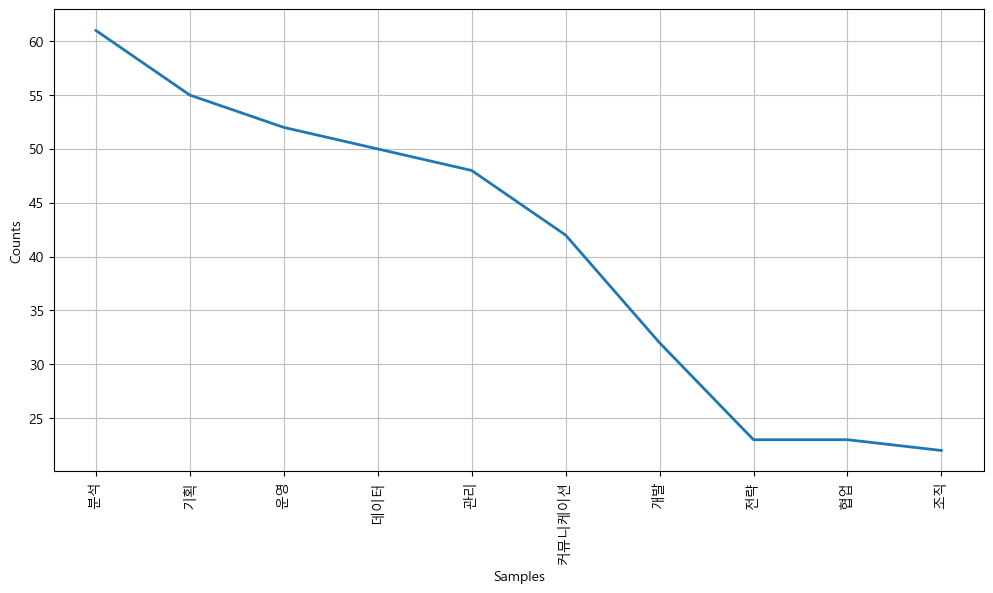

In [13]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()

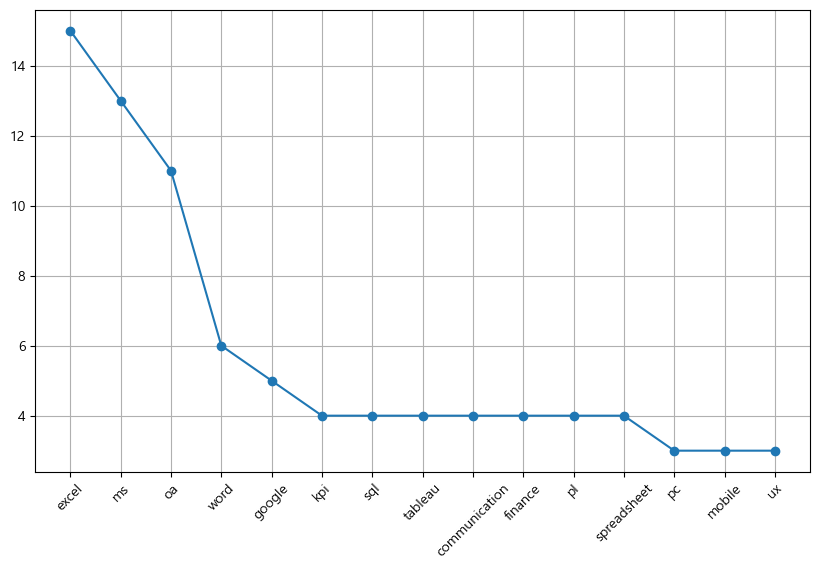

In [15]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['restful','office']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)